# Processing the configuration file

In [10]:
%pip install PyPDF2
%pip install pandas
%pip install stylecloud
%pip install gensim
%pip install networkx
%pip install matplotlib
%pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


# Import the initial file into a specific folder

In [24]:
import os

dossier = "/Users/nicolas/Documents/Python/TestProject/uploads"
nouveau_nom = "company.pdf"

for fichier in os.listdir(dossier):
    if fichier.endswith(".pdf"):
        chemin_complet = os.path.join(dossier, fichier)
        nouveau_chemin_complet = os.path.join(dossier, nouveau_nom)
        os.rename(chemin_complet, nouveau_chemin_complet)

# Processing the configuration file

In [21]:
# script_dpef.py

import PyPDF2
import config # Importez le fichier de configuration

# Utilisez les variables du fichier de configuration
company_name = "Lumibird"
start_page = 168
end_page = 200

print("Company name:", company_name)
print("Start page:", start_page)
print("End page:", end_page)

# Définir le chemin du fichier PDF d'entrée et du fichier .txt de sortie
fichier_pdf_entree = 'uploads/company.pdf'
company_dpef = 'company_dpef.txt'

# Ouvrir le fichier PDF en mode lecture binaire
with open(fichier_pdf_entree, 'rb') as pdf_file:
    # Créer un objet PdfReader (à noter le changement de classe)
    pdf_reader = PyPDF2.PdfReader(pdf_file)

    # Initialiser une variable pour stocker le texte extrait
    texte_extrait = []

    # Parcourir les pages et extraire le texte des pages spécifiées
    for page_num in range(start_page -1, end_page):
        page = pdf_reader.pages[page_num]
        texte_page = page.extract_text()
        texte_extrait.append(texte_page)

    # Concaténer le texte extrait
    texte_complet = '\n'.join(texte_extrait)

    # Écrire le texte extrait dans le fichier .txt
    with open(company_dpef, 'w', encoding='utf-8') as txt_file:
        txt_file.write(texte_complet)

print(f'Texte extrait et enregistré dans {company_dpef}')

Company name: Lumibird
Start page: 168
End page: 200
Texte extrait et enregistré dans company_dpef.txt


# Filter extracted text

In [13]:
import re
exclure_mots = [
    company_name, 'ainsi', 'directeur', 'général', 'direction', 'produit', 'autres', 'depuis', 'tout', 'ne', 'pas', 'ans', 'pays', 'afin',
    'cadre', 'universel', 'spécifique', 'audit', 'chaque', 'pay', 'administrateurs', 'toute', 'e', 'titre', 'année',
    'dirigeant', 'mandataire', 'activités', 'également', 'qu', 'tous', 'commissaire', 'compte', 'ils', 'même', 'grâce',
    'administrateur', 'n', 'nicolas', 'jean', 'soit', 'entre', 'permet', 'deux', 'voir', 'paragraphe', 'nous', 'avons',
    'etc', 'collaborateurs', 'objectif', 'entreprise', 'activité', 'fournisseur', 'fournisseurs', 'assemblée', 'générale',
    'collaborateur', 'conseil', 'société', 'notamment', 'décembre', 'administration', 'dont', 'leurs', 'document', 'enregistrement',
    'ont', 'sa', 'cette', 'son', 'oréal', 'millions', 'euros', 'groupe', 'd', 'du', 'été', 'sont', 'avec', 'de', 'la', 'ses',
    'conçoit', 'taxonomie', 'des', 'nos', 'comité', 'le', 'et', 'est', 'elle', 'une', 'en', 'que', 'aux', 'qui', 'ces', 'les',
    'dans', 'sur', 'l', 'un', 'pour', 'par', 'il', 'ou', 'à', 'ce', 'a', 'sont', 'cas', 'plus', 'leur', 'se', 's', 'vous',
    'au', 'c', 'aussi', 'toutes', 'autre', 'comme', 'actions','risques','rémunération', 'comptes','rapport','performance',
    'non','sites','être','m','site','exercice', 'oui', 'section', 'france', 'r', 'more', 'than', 'lasers', 'b', 'y', 'zrapport', 'ciaprès', 'znous',
    '›››', 'ii', 'zle'
]
# Crée une expression régulière pour rechercher les mots complets de la liste d'exclusion
exclure_pattern = r'\b(?:' + '|'.join(re.escape(mot) for mot in exclure_mots) + r')\b'

with open('company_dpef.txt', 'r', encoding='utf-8') as fichier_entree:
    contenu = fichier_entree.read()

# Utilisez re.sub() pour supprimer les mots correspondants
contenu_filtre = re.sub(exclure_pattern, '', contenu, flags=re.IGNORECASE)

with open('company_filtre.txt', 'w', encoding='utf-8') as fichier_sortie:
    fichier_sortie.write(contenu_filtre)
    
print("Le fichier company_filtre.txt a bien été créé.")

Le fichier company_filtre.txt a bien été créé.


# List a recurrence of words

In [14]:
import pandas as pd

company_filtre = 'company_filtre.txt'

# Liste des mots à rechercher
mots_a_rechercher = [
                    "risques physiques", "esg", "RSE", "Neutralité carbone", "climat", "ressources","planète", "développement durable",
                     "matérialité", "énergie","nucléaire","sécheresse","inondation","vagues de chaleur","covid","sobriété","CO2","Eau "
                     ]
# Charger le texte extrait depuis le fichier .txt
with open(company_filtre, 'r', encoding='utf-8') as txt_file:
    texte_complet = txt_file.read()

# Initialiser une liste pour stocker les résultats
resultats = []

# Parcourir la liste des mots à rechercher
for mot in mots_a_rechercher:
    # Utiliser la méthode count() pour compter le nombre d'occurrences du mot
    compte = texte_complet.lower().count(mot.lower())
    # Ajouter le résultat à la liste
    resultats.append({"Mot": mot, "Occurrences": compte})

# Créer un DataFrame à partir de la liste de résultats
df = pd.DataFrame(resultats)
df

,Mot,Occurrences
0,risques physiques,0
1,esg,1
2,RSE,64
3,Neutralité carbone,0
4,climat,15
5,ressources,15
6,planète,0
7,développement durable,0
8,matérialité,6
9,énergie,12


# Creating a stylecloud

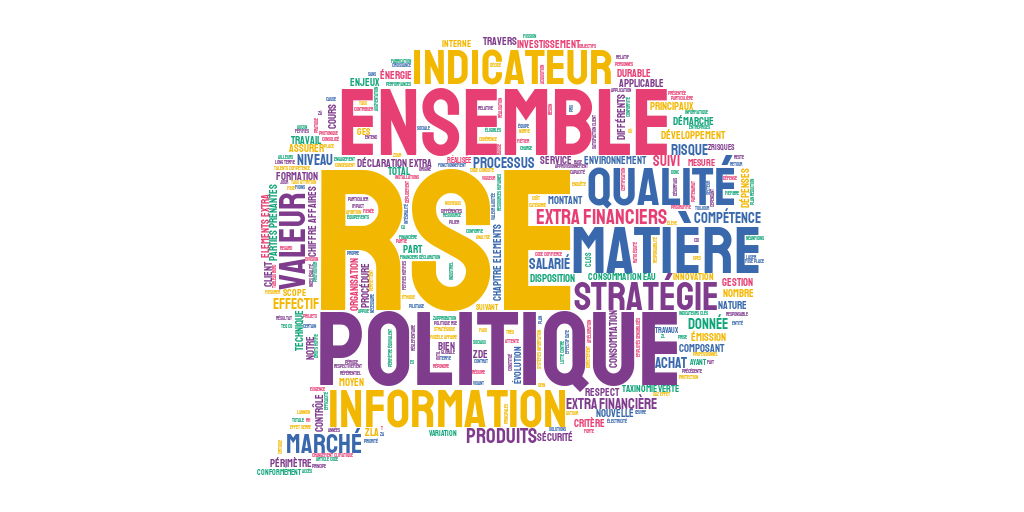

In [16]:
import os
import stylecloud

# Spécifiez le chemin complet du dossier de sortie
output_folder = "/Users/nicolas/Documents/Python/TestProject/cloud" #Changez le répertoire de sortie selon vos préférences

#Assurez-vous de changez également le chemin de l'image dans le fichier html web_final (ligne 66).

# Assurez-vous que le dossier de sortie existe, sinon créez-le
os.makedirs(output_folder, exist_ok=True)

# Générer le nuage de mots avec exclusion des mots spécifiés
stylecloud.gen_stylecloud(
    file_path="company_filtre.txt",
    icon_name="fas fa-comment",
    size=(1024, 512),
    output_name=os.path.join(output_folder, "company_cloud.png"),  # Spécifiez le chemin complet du fichier de sortie

)

from IPython.display import Image

# Afficher le nuage de mots généré
Image(filename='/Users/nicolas/Documents/Python/TestProject/cloud/company_cloud.png') #Changez le répertoire de sortie selon vos préférences

# Display the 15 most frequent words

In [17]:
import re
from collections import Counter  # Import the Counter class from collections

# Function to count word occurrences
def count_words(text, exclusion_list):
    # Use a regular expression to split the text into words
    words = re.findall(r'\b\w+\b', text.lower())
    # Use Counter to count word occurrences
    word_count = Counter(words)

    # Exclude words from the exclusion list and words containing digits
    for mot in exclusion_list:
        if mot in word_count:
            del word_count[mot]
    word_count = {mot: count for mot, count in word_count.items() if not any(char.isdigit() for char in mot)}

    return word_count

# List of words to exclude
exclure_mots = [
    company_name, 'ainsi', 'directeur', 'général', 'direction', 'produit', 'autres', 'depuis', 'tout', 'ne', 'pas', 'ans', 'pays', 'afin',
    'cadre', 'universel', 'spécifique', 'audit', 'chaque', 'pay', 'administrateurs', 'toute', 'e', 'titre', 'année',
    'dirigeant', 'mandataire', 'activités', 'également', 'qu', 'tous', 'commissaire', 'compte', 'ils', 'même', 'grâce',
    'administrateur', 'n', 'nicolas', 'jean', 'soit', 'entre', 'permet', 'deux', 'voir', 'paragraphe', 'nous', 'avons',
    'etc', 'collaborateurs', 'objectif', 'entreprise', 'activité', 'fournisseur', 'fournisseurs', 'assemblée', 'générale',
    'collaborateur', 'conseil', 'société', 'notamment', 'décembre', 'administration', 'dont', 'leurs', 'document', 'enregistrement',
    'ont', 'sa', 'cette', 'son', 'oréal', 'millions', 'euros', 'groupe', 'd', 'du', 'été', 'sont', 'avec', 'de', 'la', 'ses',
    'conçoit', 'taxonomie', 'des', 'nos', 'comité', 'le', 'et', 'est', 'elle', 'une', 'en', 'que', 'aux', 'qui', 'ces', 'les',
    'dans', 'sur', 'l', 'un', 'pour', 'par', 'il', 'ou', 'à', 'ce', 'a', 'sont', 'cas', 'plus', 'leur', 'se', 's', 'vous',
    'au', 'c', 'aussi', 'toutes', 'autre', 'comme', 'actions','risques','rémunération', 'comptes','rapport','performance',
    'non','sites','être','m','site','exercice', 'oui', 'section', 'france', 'r', 'more', 'than', 'lasers', 'b', 'y', 'zrapport', 'ciaprès', 'znous',
    '›››', 'ii', 'zle'
]
# Get the content of the filtered text file
with open('company_filtre.txt', 'r', encoding='utf-8') as text_file:
    contenu_filtre = text_file.read()

# Get the word count table while excluding digits and words from the exclusion list
word_count = count_words(contenu_filtre, exclure_mots)

# Sort the table in descending order of frequency
sorted_word_count = dict(sorted(word_count.items(), key=lambda item: item[1], reverse=True))

# Display only the top 15 most frequent words
top_15_words = dict(list(sorted_word_count.items())[:15])

# Display the top 15
for word, count in top_15_words.items():
    print(f"{word}: {count}")

rse: 57
extra: 53
politique: 44
ensemble: 38
produits: 38
déclaration: 34
indicateurs: 34
matière: 33
qualité: 33
consommation: 32
périmètre: 28
affaires: 27
stratégie: 26
financière: 25
financiers: 24


# Creating a data frame from an LDA model

In [18]:
import gensim
from gensim import corpora
import re
import pandas as pd

#Pour permettre la reproducibilité des résultats
random_seed = 42

# chargement des données
with open('company_filtre.txt', 'r', encoding='utf-8') as text_file:
    documents = text_file.readlines()

# Supprimer les caractères spéciaux
special_characters = r'[.,.°/():€«\[\]\-,%’—\'"›››;»●–|©×"+•&]'

documents = [re.sub(special_characters, '', document).strip() for document in documents]

# Supprimer les mots contenant des chiffres
documents = [re.sub(r'\w*\d\w*', '', document).strip() for document in documents]

# Tokenization
texts = [[word for word in document.lower().split()] for document in documents]

# Création du dictionnaire
dictionary = corpora.Dictionary(texts)

# Création du corpus (représentation sous forme de sacs de mots)
corpus = [dictionary.doc2bow(text) for text in texts]

# Modèle LDA
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=20, random_state=random_seed)

topics = lda_model.print_topics(num_words=20)
topic_data = []
for topic in topics:
    topic_id, words = topic
    word_list = [word.split("*")[1].strip().replace('", "', ' ') for word in words.split(" + ")]
    topic_data.append({
        'Topic': f"Topic {topic_id}",
        'Key words': ', '.join(word_list)
    })
df = pd.DataFrame(topic_data)
df

,Topic,Key words
0,Topic 0,"""code"", ""principaux"", ""commerce"", ""rse"", ""poli..."
1,Topic 1,"""informations"", ""travaux"", ""professionnelle"", ..."
2,Topic 2,"""déclaration"", ""clos"", ""procédures"", ""informat..."
3,Topic 3,"""périmètre"", ""chapitre"", ""consolidation"", ""tie..."
4,Topic 4,"""indicateurs"", ""qualité"", ""dispositions"", ""pol..."


# LDA Visualization

In [19]:
import os
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Chemin du fichier à supprimer
fichier_a_supprimer = 'lda_visualization.html'

# Vérifier si le fichier existe avant de le supprimer
if os.path.exists(fichier_a_supprimer):
    os.remove(fichier_a_supprimer)

lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=True)

pyLDAvis.save_html(lda_display, 'lda_visualization.html')
#pour que ça marche quand même il faut redémarrer l'environnement d'exécution et relancer le lda

/Users/nicolas/anaconda3/lib/python3.11/site-packages/scipy/sparse/_sputils.py:44: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  upcast = np.find_common_type(args, [])


# Display the final webpage

In [2]:
import subprocess

# Chemin du fichier HTML généré
fichier_html = 'web_final.html'

# Ouvrir le fichier HTML dans le navigateur par défaut
subprocess.run(['open', fichier_html], check=True)

CompletedProcess(args=['open', 'web_final.html'], returncode=0)